<a href="https://colab.research.google.com/github/rmoracode/examenopi/blob/main/ExamenOPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.- ¿Qué pruebas identificarías para asegurar la calidad de estos datos?**

Normalmente empiezo con un análisis de datos básico, medidas de centralización, dispersión y asimetría para ver como se situan los datos, cuanto se desplazan de la media y momento de orden R con respecto a la media.  Prueba de normalidad de muestras pequeñas, el método de prueba de Shapiro-Wilk. Otra prueba es prueba de Kolmogorov-Smirnov  para comprobar si los datos de la muestra obedecen a una determinada distribución. La otra es la prueba de homogeneidad de varianza y análisis de correlación.

**PASO 1: IMPORTAR LIBRERÍAS Y DATASETS**

In [75]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import datetime
import cv2
from IPython.display import display
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go


In [76]:
df.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [77]:
#Conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
#Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/carpetas_completa_septiembre_2021.csv', encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



In [79]:
#Veamos el dataframe
df.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN


In [80]:
#veamos su estructura
df.shape

(1307211, 19)

In [81]:
# Veamos los tipos de datos
df.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [82]:
# Convertimos la fecha del pedido en formato de fecha y hora
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'])
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
# Comprobamos el tipo de datos
df.dtypes

ao_hechos                      float64
mes_hechos                      object
fecha_hechos            datetime64[ns]
ao_inicio                        int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
delito                          object
fiscalia                        object
agencia                         object
unidad_investigacion            object
categoria_delito                object
calle_hechos                    object
calle_hechos2                   object
colonia_hechos                  object
alcaldia_hechos                 object
competencia                     object
longitud                       float64
latitud                        float64
tempo                          float64
dtype: object

In [83]:
# Comprobamos el númeto de elementos no nulos del data frame
df.info()

# Comprobar el número de elementos nulos del data frame
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307211 entries, 0 to 1307210
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ao_hechos             1306767 non-null  float64       
 1   mes_hechos            1306767 non-null  object        
 2   fecha_hechos          1306767 non-null  datetime64[ns]
 3   ao_inicio             1307211 non-null  int64         
 4   mes_inicio            1307211 non-null  object        
 5   fecha_inicio          1307208 non-null  datetime64[ns]
 6   delito                1307211 non-null  object        
 7   fiscalia              1307209 non-null  object        
 8   agencia               1307211 non-null  object        
 9   unidad_investigacion  1306984 non-null  object        
 10  categoria_delito      1307211 non-null  object        
 11  calle_hechos          1303945 non-null  object        
 12  calle_hechos2         507656 non-null   ob

ao_hechos                   444
mes_hechos                  444
fecha_hechos                444
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  3
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               3266
calle_hechos2            799555
colonia_hechos            54658
alcaldia_hechos            3779
competencia             1064079
longitud                  53702
latitud                   53702
tempo                   1307211
dtype: int64

In [84]:
#Eliminamos columnas que tiene valores nulos en su mayoria al no generar valor
df_drop  = ['tempo', 'competencia', 'calle_hechos2']
df = df.drop(df_drop, axis = 1)
df.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859


In [85]:
#Eliminamos las filas con nulos de los campos más importantes fecha_hechos y alcaldia_hechos
df = df[df['alcaldia_hechos'].notna()]
df = df[df['fecha_hechos'].notna()]

In [86]:
# Comprobar una vez más el número de elementos nulos del data frame
df.isnull().sum()

ao_hechos                   0
mes_hechos                  0
fecha_hechos                0
ao_inicio                   0
mes_inicio                  0
fecha_inicio                3
delito                      0
fiscalia                    2
agencia                     0
unidad_investigacion      226
categoria_delito            0
calle_hechos             3101
colonia_hechos          50802
alcaldia_hechos             0
longitud                49844
latitud                 49844
dtype: int64

In [87]:
# Revisamos los valores únicas de cada columna
df.nunique()

ao_hechos                    73
mes_hechos                   12
fecha_hechos             433496
ao_inicio                     6
mes_inicio                   12
fecha_inicio            1211466
delito                      344
fiscalia                     73
agencia                     209
unidad_investigacion        129
categoria_delito             18
calle_hechos             265541
colonia_hechos             1663
alcaldia_hechos             557
longitud                 872433
latitud                  882048
dtype: int64

**PASO 2: ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA**

In [88]:
df['delito'].value_counts().index

Index(['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       ...
       'UTILIZACION INDEBIDA DE LA VIA PUBLICA',
       'CONTRA LA LEY GENERAL DE EXPLOSIVOS', 'PROCREACION ASISTIDA',
       'ASOCIACION DELICTUOSA', 'CALUMNIAS',
       'ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN VIOLENCIA',
       'PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA',
       'VIOLACION A LOS DERECHOS HUMANOS',
       'EJERCICIO INDEBIDO DEL PROPIO DER.', 'SECUESTRO'],
      dtype='object', length=344)

In [89]:
df['delito'].value_counts().head(20)

VIOLENCIA FAMILIAR                                                      137303
FRAUDE                                                                   81745
ROBO DE OBJETOS                                                          75875
AMENAZAS                                                                 71535
ROBO A NEGOCIO SIN VIOLENCIA                                             67516
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA                           64020
ROBO DE ACCESORIOS DE AUTO                                               41710
DENUNCIA DE HECHOS                                                       39730
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                              36005
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA                    32871
ROBO A CASA HABITACION SIN VIOLENCIA                                     30794
ABUSO DE CONFIANZA                                                       22642
DESPOJO                                             

In [90]:
#40 tipos de delitos hacen el pareto es decir concentran el 80% de ocurrencias y 10 tipos de delitos el 50%
sum(df['delito'].value_counts().head(40))/sum(df['delito'].value_counts())

0.8104815283534805

In [91]:
top = df['delito'].value_counts().head(10)
top
topdf = pd.DataFrame(top)
topdf
topdf['nombre'] = topdf.index
topdf

,delito,nombre
VIOLENCIA FAMILIAR,137303,VIOLENCIA FAMILIAR
FRAUDE,81745,FRAUDE
ROBO DE OBJETOS,75875,ROBO DE OBJETOS
AMENAZAS,71535,AMENAZAS
ROBO A NEGOCIO SIN VIOLENCIA,67516,ROBO A NEGOCIO SIN VIOLENCIA
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,64020,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
ROBO DE ACCESORIOS DE AUTO,41710,ROBO DE ACCESORIOS DE AUTO
DENUNCIA DE HECHOS,39730,DENUNCIA DE HECHOS
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,36005,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,32871,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...


In [92]:
# GRAFICAMOS
fig = px.bar(topdf, x="nombre", y="delito", title="#delitos con mayor frecuencia")
fig.show()

In [93]:
#df['delito'].value_counts().index
topdf.index

Index(['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA'],
      dtype='object')

In [94]:
#Filtramos en el dataframe original los delitos con mayor ocurrencia
values_1=['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA']
filtered_df = df[df.delito.isin(values_1)]
print(filtered_df)
filtered_df.head()

         ao_hechos  mes_hechos  ...   longitud    latitud
3           2016.0       Enero  ... -98.976379  19.331633
4           2015.0   Diciembre  ... -99.172189  19.387114
7           2012.0      Agosto  ... -99.173480  19.394918
8           2012.0   Diciembre  ... -99.173480  19.394918
9           2016.0       Enero  ... -99.126451  19.399273
...            ...         ...  ...        ...        ...
1307201     2021.0  Septiembre  ... -99.199457  19.278167
1307203     2021.0  Septiembre  ... -99.106908  19.457341
1307205     2021.0  Septiembre  ... -99.111359  19.346721
1307207     2021.0  Septiembre  ... -99.114591  19.340434
1307210     2021.0  Septiembre  ... -99.209475  19.476235

[648310 rows x 16 columns]


,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114
7,2012.0,Agosto,2012-08-16 12:00:00,2016,Febrero,2016-02-01 03:44:15,FRAUDE,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,DELITO DE BAJO IMPACTO,MONTECITO,NAPOLES,BENITO JUAREZ,-99.173480,19.394918
8,2012.0,Diciembre,2012-12-28 12:00:00,2016,Febrero,2016-02-01 04:40:59,FRAUDE,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,DELITO DE BAJO IMPACTO,MONTECITO,NAPOLES,BENITO JUAREZ,-99.173480,19.394918
9,2016.0,Enero,2016-01-27 11:30:00,2016,Febrero,2016-02-01 05:57:36,VIOLENCIA FAMILIAR,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NUEVA SANTA ANITA,IZTACALCO,-99.126451,19.399273


In [95]:
df_group = filtered_df.groupby(["delito", "ao_hechos"], as_index=False)["mes_hechos"].count()
df_group.head()

,delito,ao_hechos,mes_hechos
0,AMENAZAS,1955.0,1
1,AMENAZAS,1956.0,1
2,AMENAZAS,1970.0,1
3,AMENAZAS,1972.0,1
4,AMENAZAS,1973.0,1


In [96]:
df_group['ao_hechos'] = df_group['ao_hechos'].astype(str)

In [97]:
df_group.dtypes

delito        object
ao_hechos     object
mes_hechos     int64
dtype: object

In [98]:
fig = px.bar(df_group, x="delito", y="mes_hechos", color="ao_hechos", title="Evolutivo por delitos")
fig.show()

**2.- ¿Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias)?**

Dentro de los delitos con mayor ocurrencias los delitos y que van al alza, están la violencia familiar, amenazas. Por el lado de los delitos que van a la baja están, la mayoria en 2020 tuvieron una caida por tema pandemia como robo a negocio sin violencia, robo de objetos, denuncia de hechos, etc.

In [99]:
# GRAFICAMOS

def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show()

barplot_visualization('alcaldia_hechos')

In [100]:
df['alcaldia_hechos'].value_counts().index

Index(['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ',
       'ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'AZCAPOTZALCO',
       ...
       'AGUA DULCE', 'NACO', 'XICOTEPEC', 'RODEO', 'CIENEGA DE FLORES',
       'ZAPOTLAN DE JUAREZ', 'AMOZOC', 'CALVILLO', 'PASO DEL MACHO',
       'BUCTZOTZ'],
      dtype='object', length=557)

**3. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea esto?**

Las top de más delitos están: 'CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ','ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN' 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO' y las de menos delitos son: 'CHARO', 'TUXTLA GUTIERREZ', 'SAN PEDRO IXTLAHUACA', 'JILOTZINGO','QUECHULTENANGO', 'MUZQUIZ', 'IRIMBO', 'SAN DIEGO DE LA UNION', 'ALMOLOYA DE ALQUISIRAS', 'LA MAGDALENA TLALTELULCO'.... Porque las alcaldias de mayores delitos estan cerca de ciudad de mexico y son de alta densidad poblacional, debido a que DF concentran gran parte de la población. 

In [101]:
df.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'colonia_hechos', 'alcaldia_hechos',
       'longitud', 'latitud'],
      dtype='object')

In [102]:
df.dtypes

ao_hechos                      float64
mes_hechos                      object
fecha_hechos            datetime64[ns]
ao_inicio                        int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
delito                          object
fiscalia                        object
agencia                         object
unidad_investigacion            object
categoria_delito                object
calle_hechos                    object
colonia_hechos                  object
alcaldia_hechos                 object
longitud                       float64
latitud                        float64
dtype: object

In [103]:
from datetime import datetime
df_group2 = df.groupby(["ao_hechos", "mes_hechos","fecha_hechos"], as_index=False)["delito"].count()
values_2=['2016', '2017', '2018', '2019', '2020', '2021']
df_group2 = df_group2[df_group2.ao_hechos.isin(values_2)]
df_group2.head()
df_group2['DOB'] = pd.to_datetime(df_group2.fecha_hechos)
df_group2.head()
df_group2['DOB1'] = df_group2['DOB'].dt.strftime('%m/%d/%Y')
df_group2.head()
df_group2['mes'] = df_group2['DOB'].dt.strftime('%b')
df_group2.head()
df_group2['diasem'] = df_group2['DOB'].dt.strftime('%a')
df_group2.head()
df_group2['sem'] = df_group2['DOB'].dt.strftime('%W')
df_group2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ao_hechos,mes_hechos,fecha_hechos,delito,DOB,DOB1,mes,diasem,sem
14773,2016.0,Abril,2016-04-01 00:00:00,15,2016-04-01 00:00:00,04/01/2016,Apr,Fri,13
14774,2016.0,Abril,2016-04-01 00:01:00,1,2016-04-01 00:01:00,04/01/2016,Apr,Fri,13
14775,2016.0,Abril,2016-04-01 00:10:00,2,2016-04-01 00:10:00,04/01/2016,Apr,Fri,13
14776,2016.0,Abril,2016-04-01 00:20:00,1,2016-04-01 00:20:00,04/01/2016,Apr,Fri,13
14777,2016.0,Abril,2016-04-01 00:30:00,3,2016-04-01 00:30:00,04/01/2016,Apr,Fri,13


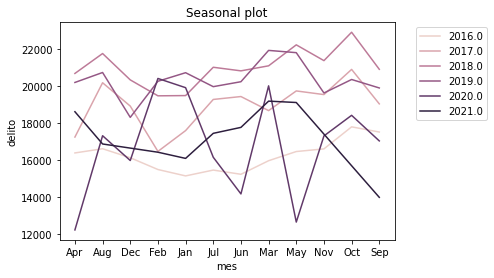

In [104]:
df_mes = df_group2.groupby(["mes","ao_hechos"], as_index=False)["delito"].sum()

#TENDENCIA ESTACIONAL
sns.lineplot(data=df_mes, 
             x='mes', 
             y='delito', 
             hue='ao_hechos', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

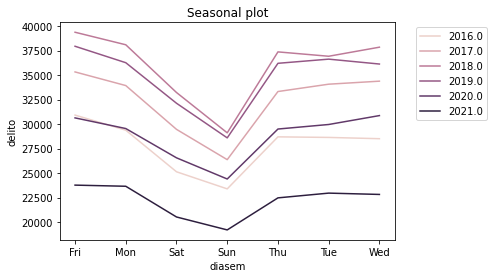

In [105]:
df_dia = df_group2.groupby(["diasem","ao_hechos"], as_index=False)["delito"].sum()

#TENDENCIA ESTACIONAL
sns.lineplot(data=df_dia, 
             x='diasem', 
             y='delito', 
             hue='ao_hechos', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

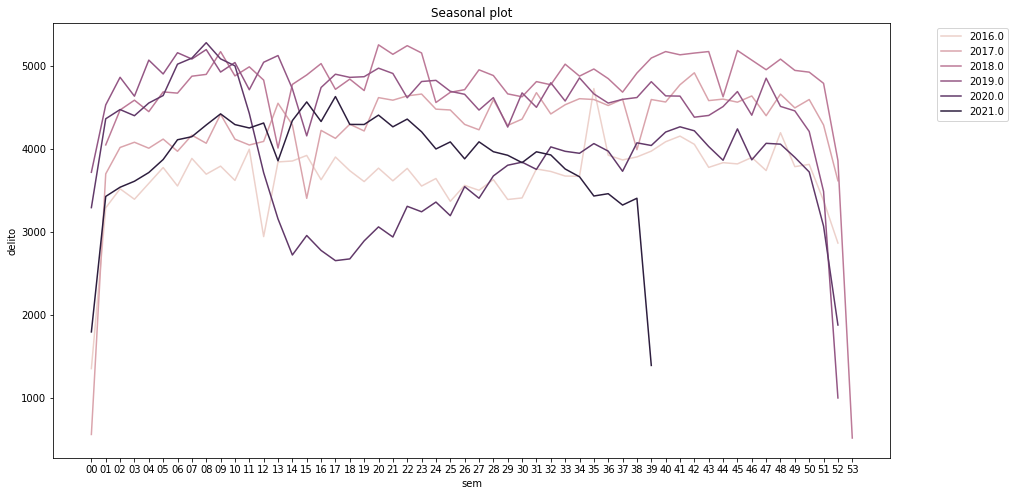

In [106]:
df_sem = df_group2.groupby(["sem","ao_hechos"], as_index=False)["delito"].sum()

#TENDENCIA ESTACIONAL
plt.figure(figsize=(15,8))

sns.lineplot(data=df_sem, 
             x='sem', 
             y='delito', 
             hue='ao_hechos', 
             legend='full')

# add title
plt.title('Seasonal plot')
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

**4.- ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX?¿A qué crees que se deba?**

Existe a nivel de mes, marzo, octubre. Entenderia que esos meses hay fiestas nacionales o feriados. En la semana a mitad de año, semanas de inicio de año y las ultimas semanas. En el caso de dias de la semana es viernes y lunes.

In [107]:
pd.crosstab(df['alcaldia_hechos'],df['delito']  )

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",AMENAZAS,ASOCIACION DELICTUOSA,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN,ATAQUES A LA PAZ PUBLICA,BIGAMIA,CALUMNIAS,CAMBIO DE USO DE SUELO,COACCION DE SERVIDORES PUBLICOS,COALICIÓN DE SERVIDORES PÚBLICOS,COBRANZA ILEGITIMA,COHECHO,CONCUSION,CONTAGIO VENERERO,CONTAMINACIÓN O RESIDUOS,CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA,CONTRA EL ESTADO CIVIL,CONTRA FUNCIONARIOS PUBLICOS,CONTRA LA INTIMIDAD SEXUAL,CONTRA LA LEY GENERAL DE EXPLOSIVOS,CORRUPCION DE MENORES,CORRUPCION DE MENORES E INCAPACES,CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA,DAÑO EN PROPIEDAD AJENA CULPOSA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES,...,SABOTAJE,SECUESTRO,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),SUSTRACCION DE MENORES,SUSTRACCIÓN DE MENORES,TALA,TENTATIVA DE EXTORSION,TENTATIVA DE FEMINICIDIO,TENTATIVA DE FRAUDE,TENTATIVA DE HOMICIDIO,TENTATIVA DE ROBO,TENTATIVA DE ROBO DE VEHICULO,TENTATIVA DE SUICIDIO,TENTATIVA DE VIOLACION,TORTURA,TRAFICO DE INFANTES,TRAFICO DE INFLUENCIA,TRATA DE PERSONAS,ULTRAJES,USO DE DOCUMENTO FALSO,USO INDEBIDO DE ATRIBUCIONES Y FACULTADES,USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS,USURPACION DE FUNCIONES,USURPACION DE FUNCIONES PUBLICAS,USURPACION DE PROFESION,USURPACIÓN DE IDENTIDAD,UTILIZACION INDEBIDA DE LA VIA PUBLICA,VARIACION DE NOMBRE O DOMICILIO,VIOLACION,VIOLACION A LOS DERECHOS HUMANOS,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACION Y ROBO DE VEHICULO,VIOLENCIA FAMILIAR
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABALA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACAMBARO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
ACAMBAY,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ACAPULCO DE JUAREZ,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,2,1,0,0,0,0,0,4
ACATLAN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINACANTEPEC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ZINAPECUARO,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [108]:
df_group2 = df.groupby(["delito", "alcaldia_hechos"], as_index=False)["mes_hechos"].count()
df_group2.head()



,delito,alcaldia_hechos,mes_hechos
0,ABANDONO DE PERSONA,AGUASCALIENTES,1
1,ABANDONO DE PERSONA,ALLENDE,1
2,ABANDONO DE PERSONA,ALVARO OBREGON,141
3,ABANDONO DE PERSONA,AZCAPOTZALCO,89
4,ABANDONO DE PERSONA,BENITO JUAREZ,173


In [109]:
#delitos que más caracterizan a cada alcaldia
max_df_group = df_group2.groupby(by = "alcaldia_hechos").max()
max_df_group.sort_values(by = "mes_hechos")
max_df_group['alcaldia_hechos'] = max_df_group.index
max_df_group.head()

,delito,mes_hechos,alcaldia_hechos
alcaldia_hechos,,,
ABALA,DENUNCIA DE HECHOS,1,ABALA
ACAMBARO,VIOLENCIA FAMILIAR,1,ACAMBARO
ACAMBAY,VIOLENCIA FAMILIAR,1,ACAMBAY
ACAPULCO DE JUAREZ,VIOLENCIA FAMILIAR,8,ACAPULCO DE JUAREZ
ACATLAN,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,1,ACATLAN


In [110]:
max_df_group['delito'].value_counts().head(20)

VIOLENCIA FAMILIAR                                       198
VIOLACION                                                 33
ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA     32
FRAUDE                                                    20
DENUNCIA DE HECHOS                                        18
SUSTRACCION DE MENORES                                    17
ABUSO SEXUAL                                              17
ROBO DE OBJETOS                                           16
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA     13
SUSTRACCIÓN DE MENORES                                    13
USURPACIÓN DE IDENTIDAD                                   12
LESIONES INTENCIONALES POR ARMA DE FUEGO                  11
PERDIDA DE LA VIDA POR QUEMADURA                           9
HOMICIDIOS INTENCIONALES (OTROS)                           9
PERDIDA DE LA VIDA POR OTRAS CAUSAS                        5
ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA                 5
INSOLVENCIA ALIMENTARIA 

In [111]:
sum(max_df_group['delito'].value_counts().head(10))/sum(max_df_group['delito'].value_counts())

0.6768402154398564

In [112]:
#delitos que menos caracterizan a cada alcaldia
min_df_group = df_group2.groupby(by = "alcaldia_hechos").min()
min_df_group.sort_values(by = "mes_hechos")
min_df_group['alcaldia_hechos'] = min_df_group.index
min_df_group.head()

,delito,mes_hechos,alcaldia_hechos
alcaldia_hechos,,,
ABALA,DENUNCIA DE HECHOS,1,ABALA
ACAMBARO,PRIVACION DE LA LIBERTAD PERSONAL,1,ACAMBARO
ACAMBAY,ABUSO SEXUAL,1,ACAMBAY
ACAPULCO DE JUAREZ,ABUSO SEXUAL,1,ACAPULCO DE JUAREZ
ACATLAN,ABUSO SEXUAL,1,ACATLAN


In [113]:
min_df_group['delito'].value_counts().head(20)

ABUSO SEXUAL                                             67
DENUNCIA DE HECHOS                                       54
ABANDONO DE PERSONA                                      47
FRAUDE                                                   35
VIOLENCIA FAMILIAR                                       34
ABUSO DE CONFIANZA                                       29
ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA    20
LESIONES INTENCIONALES POR ARMA DE FUEGO                 13
AMENAZAS                                                 13
VIOLACION                                                10
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA      9
SUSTRACCIÓN DE MENORES                                    9
ROBO DE OBJETOS                                           9
PERDIDA DE LA VIDA POR QUEMADURA                          8
HOMICIDIOS INTENCIONALES (OTROS)                          8
LESIONES CULPOSAS POR QUEMADURAS                          7
SUSTRACCION DE MENORES                  

In [114]:
sum(min_df_group['delito'].value_counts().head(10))/sum(min_df_group['delito'].value_counts())

0.578096947935368

**5.- ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás?**

La violencia familiar ocurre en más de la mitad de las alcaldias, en 198 para ser exactos, de ahí sigue violación y robo de vehiculos. Mientras que los delitos que menos suceden con frecuencia en las alcaldias son abuso sexual, denuncia de hechos y abandono de persona... Está claro que por la situación de pandemia, influyo también en la situación de relaciones familiares, debido al cambio social que pasamos por varios meses. 

In [115]:
df.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'colonia_hechos', 'alcaldia_hechos',
       'longitud', 'latitud'],
      dtype='object')

In [116]:
df_group3 = df.groupby(["ao_hechos", "mes_hechos", "alcaldia_hechos"], as_index=False)["delito"].count()
df_group3.head()
values_3=['2016', '2017', '2018', '2019','2020','2021']
df_group3 = df_group3[df_group3.ao_hechos.isin(values_3)]
df_group3.head()

,ao_hechos,mes_hechos,alcaldia_hechos,delito
2984,2016.0,Abril,ACOLMAN,2
2985,2016.0,Abril,ALVARO OBREGON,1014
2986,2016.0,Abril,ATIZAPAN,1
2987,2016.0,Abril,ATIZAPAN DE ZARAGOZA,3
2988,2016.0,Abril,AZCAPOTZALCO,824


In [117]:
df_group3['AVG_SALARY'] = df_group3.groupby('alcaldia_hechos').delito.transform('mean')
df_group3.head()
df_group3['AVG_SALARY']

2984       1.181818
2985    1268.869565
2986       1.111111
2987       2.415094
2988     904.710145
           ...     
7245    1070.130435
7246       1.200000
7247     585.000000
7248       1.000000
7249       1.529412
Name: AVG_SALARY, Length: 4266, dtype: float64

In [118]:
df_group4 = df_group3.groupby(["alcaldia_hechos"], as_index=False)["delito"].mean()
df_group4.head()


,alcaldia_hechos,delito
0,ABALA,1.000000
1,ACAMBARO,1.000000
2,ACAMBAY,1.000000
3,ACAPULCO DE JUAREZ,1.885714
4,ACATLAN,1.000000


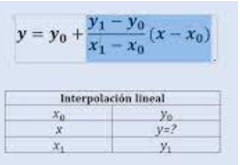

In [119]:
max_value = max(df_group4['delito'])
max_value

2828.246376811594

In [120]:
min_value = min(df_group4['delito'])
min_value

1.0

In [121]:
df_group4['Indice'] = 5+((1-5)/(min_value-max_value)*(df_group4['delito']-max_value))

In [122]:
df_group4.sort_values(by = "delito")

,alcaldia_hechos,delito,Indice
0,ABALA,1.000000,1.000000
300,OZUMBA,1.000000,1.000000
299,OTZOLOTEPEC,1.000000,1.000000
298,OTUMBA,1.000000,1.000000
297,OTHON P. BLANCO,1.000000,1.000000
...,...,...,...
28,ALVARO OBREGON,1268.869565,2.793787
67,BENITO JUAREZ,1516.536232,3.144187
177,GUSTAVO A MADERO,1871.608696,3.646545
211,IZTAPALAPA,2797.304348,4.956223


**Reglas del indice**
4-5 => Muy inseguro
3-4 => Inseguro
2-3 => Poco Inseguro
1-2 => Seguro

**6.-¿Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?**

El indicador está basado en interpolación lineal, considerando el de mas alto promedio mensual de delitos, y el de menor promedio mensual de delitos. Posteriormente el indice se asigna 5 al mas alto y 1 al mas bajo. Y de ahi se aplica la formula mencionada anteriormente. Donde dependiendo del resultado se define si la ciudad es insegura o segura. Las decisiones que podrian tomar, es dividir las operaciones policiales, asignación de presupuesto con mayor equipos a las zonas mas inseguras, para minimizar los efectos generados por esta situación social. Esto se encuentra correlacionado al turismo, las alcaldias más seguras deben ser promocionadas para generar mayor visita que signifique mayores remesas para los mexicanos, y las alcaldias mas inseguras deberan tener un fuerte control militar en las zonas turisticas, para que no generen alguna situación defavorable para el turista. Adicional el nivel de delitos impacta negativamente en el mercado inmobiliario y negocios del sector, lo cual debe ser controlado. 

**A continuación veremos la opción B, que es un modelo de agrupación**

In [123]:
df_cluster = pd.crosstab(df['alcaldia_hechos'],df['delito']  )
df_cluster.head()

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",AMENAZAS,ASOCIACION DELICTUOSA,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN,ATAQUES A LA PAZ PUBLICA,BIGAMIA,CALUMNIAS,CAMBIO DE USO DE SUELO,COACCION DE SERVIDORES PUBLICOS,COALICIÓN DE SERVIDORES PÚBLICOS,COBRANZA ILEGITIMA,COHECHO,CONCUSION,CONTAGIO VENERERO,CONTAMINACIÓN O RESIDUOS,CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA,CONTRA EL ESTADO CIVIL,CONTRA FUNCIONARIOS PUBLICOS,CONTRA LA INTIMIDAD SEXUAL,CONTRA LA LEY GENERAL DE EXPLOSIVOS,CORRUPCION DE MENORES,CORRUPCION DE MENORES E INCAPACES,CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA,DAÑO EN PROPIEDAD AJENA CULPOSA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES,...,SABOTAJE,SECUESTRO,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),SUSTRACCION DE MENORES,SUSTRACCIÓN DE MENORES,TALA,TENTATIVA DE EXTORSION,TENTATIVA DE FEMINICIDIO,TENTATIVA DE FRAUDE,TENTATIVA DE HOMICIDIO,TENTATIVA DE ROBO,TENTATIVA DE ROBO DE VEHICULO,TENTATIVA DE SUICIDIO,TENTATIVA DE VIOLACION,TORTURA,TRAFICO DE INFANTES,TRAFICO DE INFLUENCIA,TRATA DE PERSONAS,ULTRAJES,USO DE DOCUMENTO FALSO,USO INDEBIDO DE ATRIBUCIONES Y FACULTADES,USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS,USURPACION DE FUNCIONES,USURPACION DE FUNCIONES PUBLICAS,USURPACION DE PROFESION,USURPACIÓN DE IDENTIDAD,UTILIZACION INDEBIDA DE LA VIA PUBLICA,VARIACION DE NOMBRE O DOMICILIO,VIOLACION,VIOLACION A LOS DERECHOS HUMANOS,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACION Y ROBO DE VEHICULO,VIOLENCIA FAMILIAR
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABALA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACAMBARO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
ACAMBAY,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ACAPULCO DE JUAREZ,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,2,1,0,0,0,0,0,4
ACATLAN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
 features =       ['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA']

In [125]:
#filtro el contenido dejando solo las columnas seleccionadas
df_cluster = df_cluster[features]
df_cluster.head()

delito,VIOLENCIA FAMILIAR,FRAUDE,ROBO DE OBJETOS,AMENAZAS,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,DENUNCIA DE HECHOS,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA
alcaldia_hechos,,,,,,,,,,
ABALA,0,0,0,0,0,0,0,1,0,0
ACAMBARO,1,0,0,0,0,0,0,0,0,0
ACAMBAY,1,1,0,0,0,0,0,0,0,0
ACAPULCO DE JUAREZ,4,4,6,1,0,1,0,0,0,3
ACATLAN,0,0,0,0,0,0,0,0,0,0


In [126]:
# Escalamos los datos
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled.shape

(557, 10)

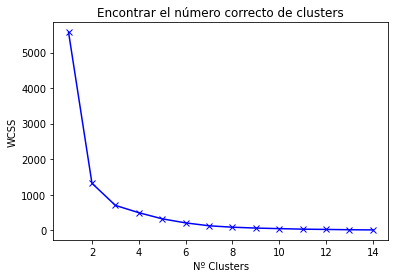

In [127]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_cluster_scaled)
  scores.append(kmeans.inertia_) # la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano

plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS') 
plt.show()


In [128]:
# Agrupar los datos usando k-means
kmeans = KMeans(5)
kmeans.fit(df_cluster_scaled)
labels = kmeans.labels_

In [129]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
kmeans.cluster_centers_.shape

(5, 10)

In [131]:
# Echemos un vistazo a los centros de los clústeres
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_cluster.columns])
cluster_centers 

delito,VIOLENCIA FAMILIAR,FRAUDE,ROBO DE OBJETOS,AMENAZAS,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,DENUNCIA DE HECHOS,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA
0,-0.127576,-0.117163,-0.129343,-0.133490,-0.129088,-0.126398,-0.122466,-0.123699,-0.138381,-0.131703
1,12.016514,5.224980,7.872658,10.468035,9.581736,10.897084,6.062782,8.334076,7.152901,12.082328
2,4.538427,3.387308,4.230540,4.598558,3.831915,3.964538,3.453309,3.726780,5.440337,4.590935
3,2.849116,9.079921,6.391621,4.727416,8.632181,4.104569,14.510978,5.387898,9.145703,6.563795
4,6.339545,17.225235,14.510419,10.300194,11.901886,11.271847,12.480850,15.545614,8.443285,4.322309


In [132]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_cluster.columns])
cluster_centers

delito,VIOLENCIA FAMILIAR,FRAUDE,ROBO DE OBJETOS,AMENAZAS,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,DENUNCIA DE HECHOS,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA
0,30.565138,8.456881,7.623853,10.719266,4.708257,5.491743,2.192661,3.814679,2.977982,4.899083
1,20586.000000,6314.500000,7963.500000,9359.000000,8769.000000,9550.500000,3673.500000,4620.000000,3252.000000,5023.500000
2,7928.375000,4145.250000,4342.375000,4183.375000,3579.625000,3547.750000,2124.625000,2105.375000,2488.875000,1945.375000
3,5069.000000,10865.000000,6491.000000,4297.000000,7912.000000,3669.000000,8688.000000,3012.000000,4140.000000,2756.000000
4,10977.000000,20480.000000,14563.000000,9211.000000,10863.000000,9875.000000,7483.000000,8556.000000,3827.000000,1835.000000


Como podemos ver otra manera de realizar el indicador seria a traves de una clusterización donde tengamos agrupados todas las alcaldias en 5 grupos de esa manera poder realizar soluciones focalizadas de acuerdo al mayor delito que se presente.
Si vemos el cluster 2 representa las alcaldias donde hay mayor presencia de delitos sobre violencia familiar,  asi mismo en el delito de transeunte en via publica por violencia. Un cluster 3 alto nivel de delitos de fraude.. Ahi seria se debe aplicar otro tipo de plan...